In [114]:
import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)

['/home/alunos/visao/aula8/Horses14.jpg', '/home/alunos/visao/aula8/Buildings1.jpg', '/home/alunos/visao/aula8/Flowers2.jpg', '/home/alunos/visao/aula8/Beach2.jpg', '/home/alunos/visao/aula8/Beach1.jpg', '/home/alunos/visao/aula8/Buildings3.jpg', '/home/alunos/visao/aula8/Mountains54.jpg', '/home/alunos/visao/aula8/Buses3.jpg', '/home/alunos/visao/aula8/Horses16.jpg', '/home/alunos/visao/aula8/Buses9.jpg', '/home/alunos/visao/aula8/Beach3.jpg', '/home/alunos/visao/aula8/Buildings2.jpg', '/home/alunos/visao/aula8/Buses10.jpg', '/home/alunos/visao/aula8/Mountains52.jpg', '/home/alunos/visao/aula8/Mountains53.jpg', '/home/alunos/visao/aula8/Horses15.jpg', '/home/alunos/visao/aula8/Flowers4.jpg', '/home/alunos/visao/aula8/Flowers1.jpg']


In [115]:
diretorio, arquivo = path, filename = os.path.split(files_path[0])
print(arquivo)

Horses14.jpg


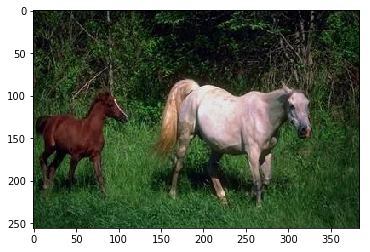

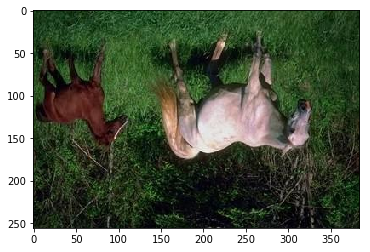

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagem = cv2.imread(arquivo)
imagemEspelhada = imagem[::-1,:,::-1]
             
plt.imshow(imagem[:,:,::-1])
plt.show()
plt.imshow(imagemEspelhada)
plt.show()

In [117]:
for img in files_path:
    dire, arq = path, filename = os.path.split(img)
    imagem =  cv2.imread(arq)
    nome = arq.split('.')
    imagemEspelhada = imagem[::-1, :, :]
    cv2.imwrite(nome[0] + 'inv.jpg', imagemEspelhada)

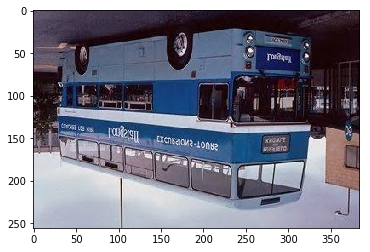

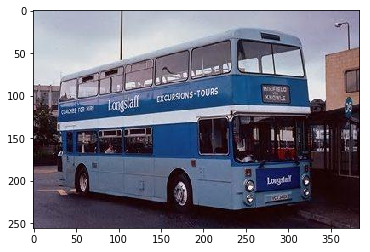

In [118]:
_ = cv2.imread('Buses10inv.jpg')
plt.imshow(_[:,:,::-1])
plt.show()

_ = cv2.imread('Buses10.jpg')
plt.imshow(_[:,:,::-1])
plt.show()

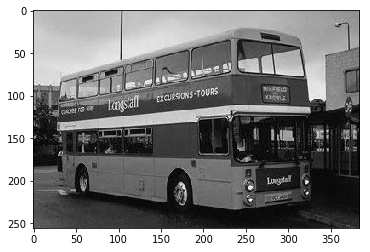

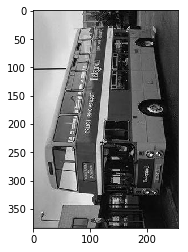

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread('Buses10.jpg', 0)

qtdeLinhas, qtdeColunas = imagemOriginal.shape

imagemModificada = np.zeros((qtdeColunas, qtdeLinhas))

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        imagemModificada[j,i] = imagemOriginal[i,j]
                

plt.gray()               
plt.imshow(imagemOriginal)
plt.show()          
plt.imshow(imagemModificada)

[(0.0, 'Flowers1.jpg'), (0.014526367187499993, 'Flowers1inv.jpg'), (0.5087076822916663, 'Buildings2inv.jpg'), (0.5102742513020835, 'Buildings2.jpg'), (0.8004760742187502, 'Buses9inv.jpg'), (0.8082071940104165, 'Buses9.jpg'), (0.8154296875000003, 'Horses16.jpg'), (0.8156941731770827, 'Horses16inv.jpg'), (0.8171590169270833, 'Mountains53inv.jpg'), (0.8178710937499997, 'Mountains53.jpg')]


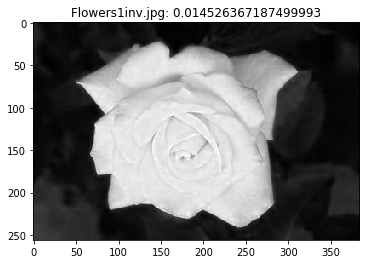

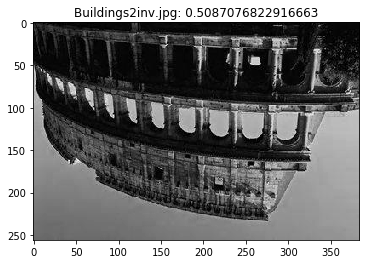

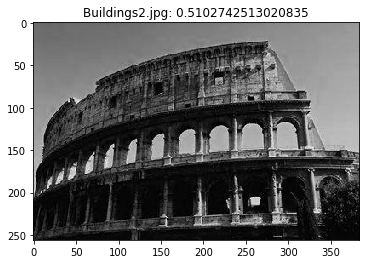

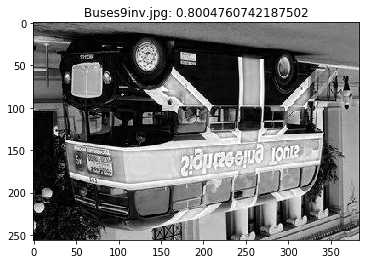

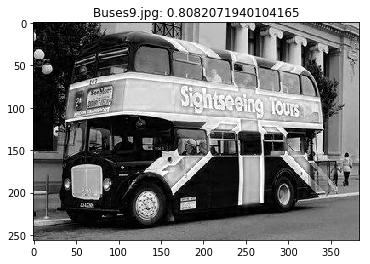

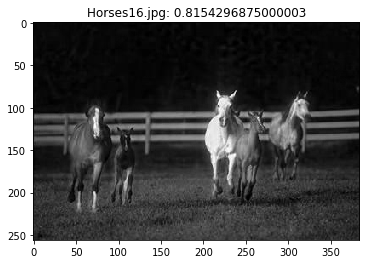

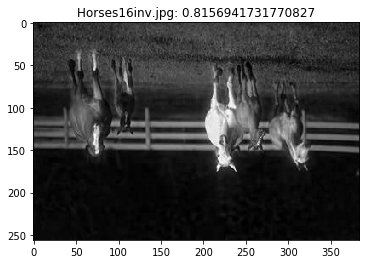

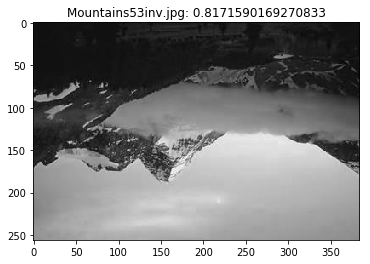

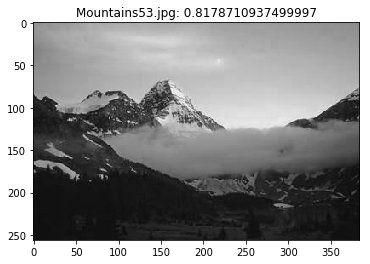

In [120]:
def calc_histograma(path):
    img = cv2.imread(path,0)
    hist = [0] * 256
    for pix in img.flatten():
        hist[pix] += 1
    return hist


def normalize(hist):
    total = np.sum(hist)
    arr = np.array(hist)
    arr = arr / total
    return arr

def distance_manhattan(hist1, hist2):
    distance = 0
    for pix in range(len(hist1)):
        distance += abs(hist1[pix] - hist2[pix])
    return distance

def distance_euclides(hist1, hist2):
    distance = 0
    for pix in range(len(hist1)):
        distance += (hist1[pix] - hist2[pix]) ** 2
    distance = np.sqrt(distance)
    return distance


def find(img_query):
    ranking = []
    query_ = normalize(calc_histograma(img_query))
    files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
    for img in files_path:
        dire, arq = path, filename = os.path.split(img)
        hist_normal = normalize(calc_histograma(arq))
        ranking.append((distance_manhattan(hist_normal, query_),arq))
    return sorted(ranking)

ranking = find('Flowers1.jpg')
print(ranking[:10])
for tup in ranking[:10]:
    if tup[0] != 0:
        plt.title(tup[1] + ": " + str(tup[0]))
        plt.imshow(cv2.imread(tup[1])[:,:,-1])
        plt.show()

In [121]:
def find2(img_query):
    ranking = []
    query_ = normalize(calc_histograma(img_query))
    files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
    for img in files_path:
        dire, arq = path, filename = os.path.split(img)
        hist_normal = normalize(calc_histograma(arq))
        ranking.append((distance_euclides(hist_normal, query_),arq))
    return sorted(ranking)


find2('Flowers1.jpg')[:10]

[(0.0, 'Flowers1.jpg'),
 (0.0013558111231726994, 'Flowers1inv.jpg'),
 (0.048610537294755236, 'Buildings2inv.jpg'),
 (0.04955790762719805, 'Buildings2.jpg'),
 (0.06842497599500313, 'Buses9inv.jpg'),
 (0.06904424282195173, 'Horses16inv.jpg'),
 (0.06907205408177385, 'Horses16.jpg'),
 (0.06950010794073559, 'Buses9.jpg'),
 (0.07190634077579323, 'Buses3inv.jpg'),
 (0.07430873401821576, 'Buses3.jpg')]

0.043629964192708336


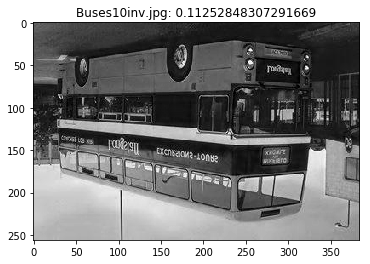

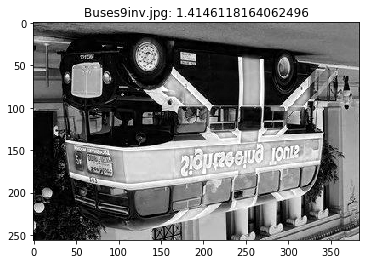

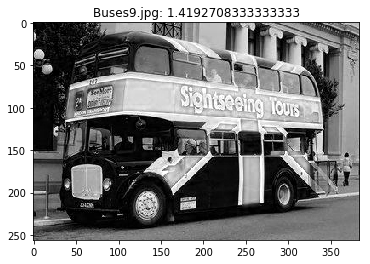

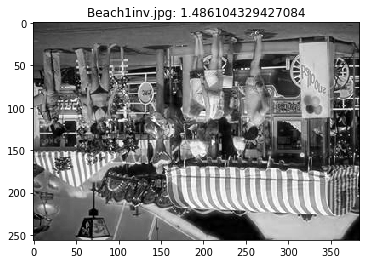

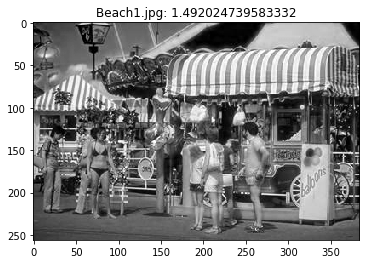

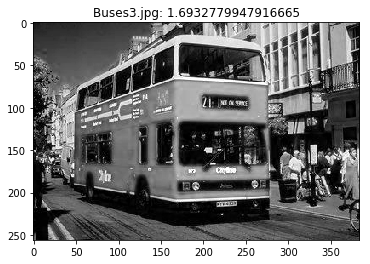

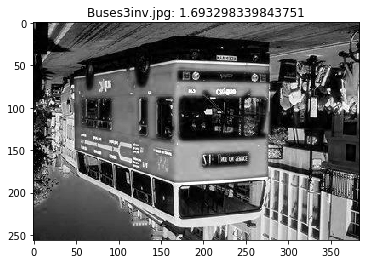

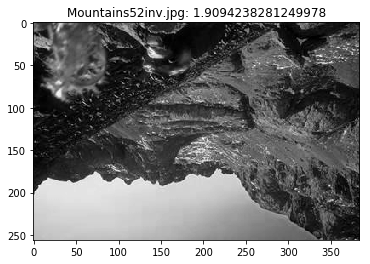

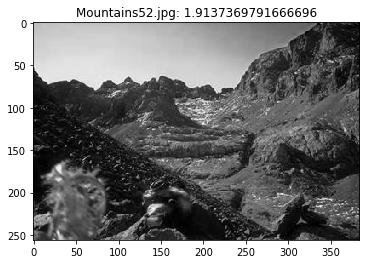

In [133]:
def calc_histograma_rgb(path):
    img = cv2.imread(path)
    histb = [0] * 256
    histg = [0] * 256
    histr = [0] * 256
    B = img[:, :, 0]
    G = img[:, :, 1]
    R = img[:, :, 2]
    
    for lin in img:
        for pix in lin:
            histb[pix[0]] += 1
            histg[pix[1]] += 1
            histr[pix[2]] += 1
    return np.append(normalize(histb), np.append(normalize(histg), normalize(histr)))

_ = calc_histograma_rgb('Flowers1.jpg')
print(np.sum(_[0]))

def findrgb(img_query):
    ranking = []
    query_ = calc_histograma_rgb(img_query)
    files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
    for img in files_path:
        dire, arq = path, filename = os.path.split(img)
        hist_normal = calc_histograma_rgb(arq)
        ranking.append((distance_manhattan(hist_normal, query_),arq))
    return sorted(ranking)

ranking = findrgb('Buses10.jpg')

for tup in ranking[:10]:
    if tup[0] != 0:
        plt.title(tup[1] + ": " + str(tup[0]))
        plt.imshow(cv2.imread(tup[1])[:,:,-1])
        plt.show()

# TEXTURA

In [186]:
# LBP

def lbp(img):
    W = np.zeros(img.shape[:2])
    linhas, cols = img.shape[:2]
    kernel = [ [1, 1, 1], [0, 0, 0], [0,0,1]]
    
    for i in range(1, linhas-1):
        for j in range(1, cols-1):
            A = int(not img[i,j] > img[i-1,j])
            B = int(not img[i,j] > img[i - 1, j + 1])
            C = int(not img[i,j] > img[i, j + 1])
            D = int(not img[i,j] > img[i + 1, j + 1])
            E = int(not img[i,j] > img[i + 1, j])
            F = int(not img[i,j] > img[i + 1, j-1])
            G = int(not img[i,j] > img[i,j-1])
            H = int(not img[i,j] > img[i-1, j-1])
            
            num = str(A) + str(B) + str(C) + str(D) + str(E) + str(F) + str(G) + str(H)
            W[i,j] = int(num, 2)
    return W
            
def calc_histograma2(img):
    hist = [0] * 256
    for pix in img.flatten():
        hist[int(pix)] += 1
    return normalize(np.array(hist))

def find_by_texture(img_query):
    ranking = []
    text_img = lbp(cv2.imread(img_query, 0))
    plt.imshow(text_img)
    plt.show()
    query_ = calc_histograma2(text_img)
    files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
    
    for img in files_path:
        
        dire, arq = path, filename = os.path.split(img)
        
        hist_normal = calc_histograma2(lbp(cv2.imread(arq, 0)))
        
        ranking.append((distance_euclides(hist_normal, query_),arq))
    return sorted(ranking)

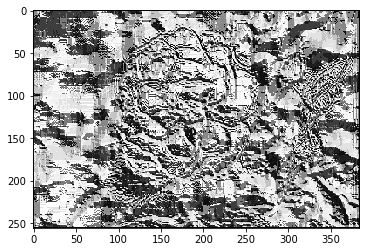

In [ ]:
ranking = find_by_texture('Flowers2.jpg')[:10]
for tup in ranking[:10]:
    if tup[0] != 0:
        plt.title(tup[1] + ": " + str(tup[0]))
        plt.imshow(cv2.imread(tup[1])[:,:,::-1])
        plt.show()